In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
penguin = pd.read_csv('penguins.csv', delimiter=';')
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [42]:
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [86]:
penguin['year'].unique()

array([2007, 2008, 2009])

In [44]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [45]:
penguin['bill_length_mm'] = penguin['bill_length_mm'].fillna(penguin['bill_length_mm'].mean())
penguin['bill_depth_mm'] = penguin['bill_depth_mm'].fillna(penguin['bill_depth_mm'].mean())
penguin['flipper_length_mm'] = penguin['flipper_length_mm'].fillna(penguin['flipper_length_mm'].mean())
penguin['body_mass_g'] = penguin['body_mass_g'].fillna(penguin['body_mass_g'].mean())

penguin.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [46]:
penguin['sex'] = penguin['sex'].fillna(penguin['sex'].mode())

In [47]:
penguin.groupby('sex').count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,,,
female,165,165,165,165,165,165,165
male,168,168,168,168,168,168,168


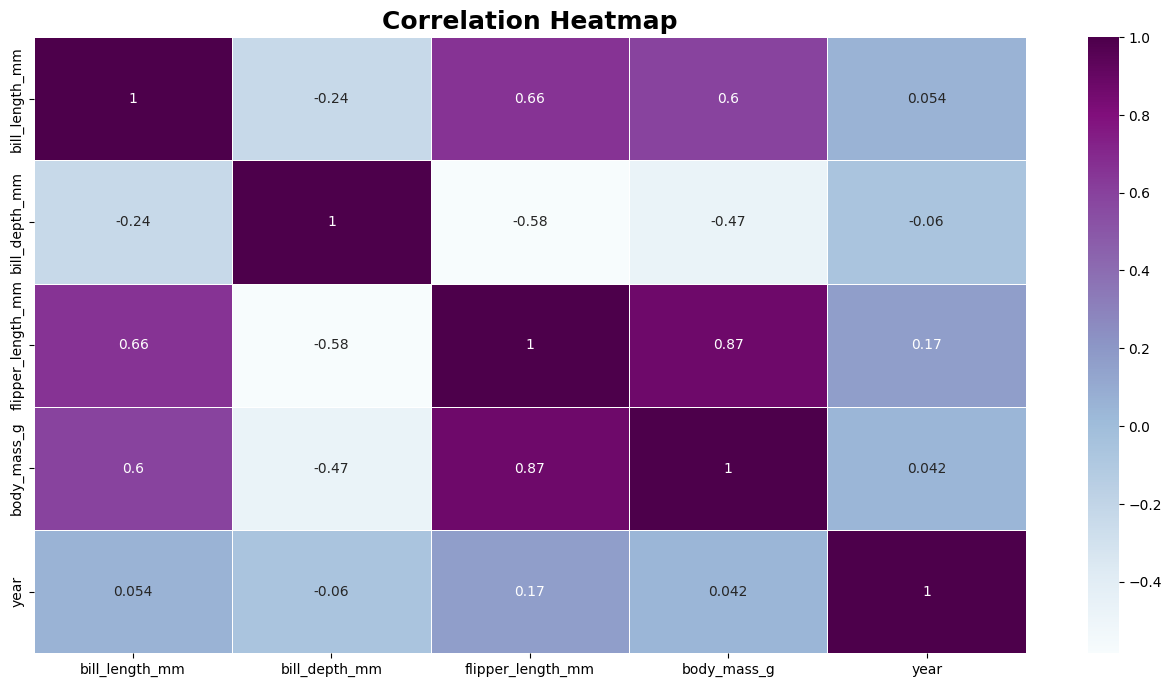

In [48]:
# Correlation heatmap


plt.figure(figsize= (16,8))
numeric_df = penguin.select_dtypes(include=[float, int])

sns.heatmap(
    numeric_df.corr(),
    annot= True,
    cmap="BuPu",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
plt.show()

In [49]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

penguin['sex_encoded'] =encoder.fit_transform(penguin['sex'])


In [51]:
penguin['island_encoded'] = encoder.fit_transform(penguin['island'])

In [52]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,sex_encoded,island_encoded
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007,1,2
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007,0,2
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007,0,2
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007,2,2
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007,0,2


In [53]:
penguin.drop(columns=['sex','island'], inplace=True)

In [54]:
penguin.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_encoded,island_encoded
0,Adelie,39.10000,18.70000,181.000000,3750.000000,2007,1,2
1,Adelie,39.50000,17.40000,186.000000,3800.000000,2007,0,2
2,Adelie,40.30000,18.00000,195.000000,3250.000000,2007,0,2
3,Adelie,43.92193,17.15117,200.915205,4201.754386,2007,2,2
4,Adelie,36.70000,19.30000,193.000000,3450.000000,2007,0,2


In [55]:
X = penguin.drop(columns=['species'], axis='columns')
y = penguin['species']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=48, stratify=y)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [85]:
knn.score(X_test, y_test)

0.8604651162790697

In [82]:
# We create k_range: a list of integer values from 1 to 20
k_range = list(range(1,21))
# We create an empty list to store the accuracy scores of each model
scores = [None] * 20
# create dataframe with k as index and a score column
df = pd.DataFrame(scores,columns=['score'], index=k_range)
# Show it
print(df)

   score
1   None
2   None
3   None
4   None
5   None
6   None
7   None
8   None
9   None
10  None
11  None
12  None
13  None
14  None
15  None
16  None
17  None
18  None
19  None
20  None


In [83]:
# We use 20 different KNN classifiers
# We store the associated accuracy score in the list
for k in k_range:
    # fit a KNN(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    # add the corresponding accuracy score
    df["score"][k] = score
# show the score list
print(df)

       score
1   0.860465
2   0.813953
3   0.802326
4   0.732558
5   0.825581
6   0.767442
7   0.755814
8    0.77907
9   0.755814
10  0.744186
11  0.744186
12  0.744186
13  0.744186
14  0.744186
15  0.732558
16  0.755814
17  0.755814
18  0.755814
19  0.767442
20  0.755814


In [90]:
penguin['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

## Decision Tree

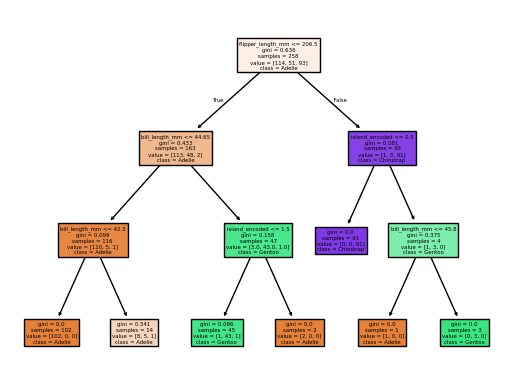

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# We want a tree with a depth of 1 for the moment
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)
# we show the decision tree information
tree.plot_tree(clf, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year', 'sex_encoded', 'island_encoded'],
               class_names=['Adelie', 'Gentoo', 'Chinstrap'], filled=True);

In [105]:
# Predict the species based on the decision tree with a depth of 3
clf.predict(X_test)
y_predict=clf.predict(X_test)
# The score method returns the accuracy score of the model
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_predict)
print(score)

0.9883720930232558


In [109]:

# We create k_range: a list of integer values from 1 to 20
max_depth_range = list(range(1,21))
# We create an empty list to store the accuracy scores of each model
scores = [None] * 20
# create dataframe with k as index and a score column
df = pd.DataFrame(scores,columns=['score'], index=max_depth_range)
# We use 20 different depths for the decision tree 
# We store the associated accuracy score in the list
for depth in max_depth_range:
    # fit a Decision Tree(depth)
    dt = DecisionTreeClassifier(max_depth = depth, random_state =0)
    dt.fit(X_train, y_train)
    score = dt.score(X_test,y_test)
    # add the corresponding accuracy score
    df["score"][depth] = score
# show the score list
print(df)

       score
1   0.790698
2   0.976744
3   0.988372
4   0.988372
5   0.988372
6   0.988372
7   0.988372
8   0.988372
9   0.988372
10  0.988372
11  0.988372
12  0.988372
13  0.988372
14  0.988372
15  0.988372
16  0.988372
17  0.988372
18  0.988372
19  0.988372
20  0.988372


## Neural Network

In [140]:
from sklearn.neural_network import MLPClassifier

# Create and train neural network
clf=MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=(100),alpha=0.1, max_iter=10000, random_state=48)
clf.fit(X_train, y_train)

# Report accuracy score
print("Accuracy score is:", clf.score(X_test, y_test))

Accuracy score is: 0.7558139534883721


In [139]:
#create dataframe to store model version and score
df_scores = pd.DataFrame(columns = ["Activation","Solver", "Layers", "Alpha", 'Score'])

# Try various combinations:
for activation in ['relu','logistic']:
    for solver in ["adam", "sgd"]:
        for layer in [(100), (50,50), (10,10,10)]:
            for alpha in [(0.1), (0.05), (0.01)]:
                nn=MLPClassifier(solver=solver, activation=activation, hidden_layer_sizes=layer,alpha=1e-04,random_state=0)
                nn.fit(X_train, y_train)
                y_predict=nn.predict(X_test)
                score = nn.score(X_test,y_test)
                df_scores =  df_scores._append({"Activation": activation,  "Solver":  solver, "Layers":  layer,
                                            "Alpha" : alpha,  "Score":  score},ignore_index=True)

# Show the best classifier(s):
df_scores.sort_values(by=["Score"],ascending=False).head(n=10)

,Activation,Solver,Layers,Alpha,Score
0,relu,adam,100,0.10,0.755814
1,relu,adam,100,0.05,0.755814
2,relu,adam,100,0.01,0.755814
3,relu,adam,"(50, 50)",0.10,0.755814
4,relu,adam,"(50, 50)",0.05,0.755814
5,relu,adam,"(50, 50)",0.01,0.755814
23,logistic,adam,"(50, 50)",0.01,0.744186
22,logistic,adam,"(50, 50)",0.05,0.744186
21,logistic,adam,"(50, 50)",0.10,0.744186
20,logistic,adam,100,0.01,0.732558
